In [9]:
import numpy as np
import matplotlib.pyplot as plt

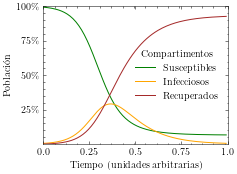

In [10]:
I = np.zeros(130)
S = np.zeros(130)
R = np.zeros(130)

i_initial = 1
N = 200

I[0] = i_initial
S[0] = N-i_initial

betta = 0.20
mu = 0.07

def variations(S, I, R, betta, mu):
    return -S*I/N*betta, S*I/N*betta - mu*I, mu*I

for t in range(len(S)-1):
    c1, c2, c3 = variations(S[t], I[t], R[t], betta, mu)

    S[t+1] = S[t] + c1
    I[t+1] = I[t] + c2
    R[t+1] = R[t] + c3

with plt.style.context('science'):
    fig = plt.figure()
    plt.plot(S, label='Susceptibles', color='green')
    plt.plot(I, label='Infecciosos', color='orange')
    plt.plot(R, label='Recuperados', color='brown')
    
    plt.xlabel("Tiempo (unidades arbitrarias)")
    plt.xticks(ticks= np.linspace(0, len(I), 5, dtype=int), labels=list(map(str, np.linspace(0, 1, 5))))
    plt.ylabel("Población ")
    plt.yticks(ticks= np.linspace(N/4, N, 4, dtype=int), labels=list(map(lambda x: f"{int(x)}\%", np.linspace(0.25, 1, 4)*100)))
    plt.legend(title='Compartimentos')
    plt.xlim(0, len(S))
    plt.ylim(0, N)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/SIR_model.pdf")

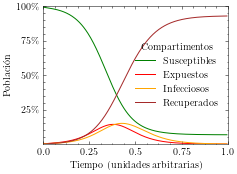

In [11]:
I = np.zeros(260)
E = np.zeros(260)
S = np.zeros(260)
R = np.zeros(260)

i_initial = 1
N = 200

I[0] = i_initial
S[0] = N-i_initial

betta = 0.20
mu = 0.07
eta = 0.08

def variations(S, E, I, R, betta, mu):
    return -S*I/N*betta, S*I/N*betta - eta*E, eta*E - mu*I, mu*I

for t in range(len(S)-1):
    c1, c2, c3, c4 = variations(S[t], E[t], I[t], R[t], betta, mu)

    S[t+1] = S[t] + c1
    E[t+1] = E[t] + c2
    I[t+1] = I[t] + c3
    R[t+1] = R[t] + c4

with plt.style.context('science'):
    fig = plt.figure()
    plt.plot(S, label='Susceptibles', color='green')
    plt.plot(E, label='Expuestos', color='red')
    plt.plot(I, label='Infecciosos', color='orange')
    plt.plot(R, label='Recuperados', color='brown')
    
    plt.xlabel("Tiempo (unidades arbitrarias)")
    plt.xticks(ticks= np.linspace(0, len(I), 5, dtype=int), labels=list(map(str, np.linspace(0, 1, 5))))
    plt.ylabel("Población ")
    plt.yticks(ticks= np.linspace(N/4, N, 4, dtype=int), labels=list(map(lambda x: f"{int(x)}\%", np.linspace(0.25, 1, 4)*100)))
    plt.legend(title='Compartimentos')
    plt.xlim(0, len(S))
    plt.ylim(0, N)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/SEIR_model.pdf")

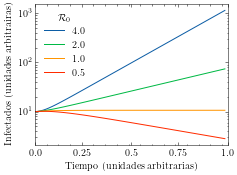

In [12]:
I = np.zeros(70)
E = np.zeros(70)


R_0= [4, 2, 1, 0.5]

i_initial = 10

I[0] = i_initial
E[0] = i_initial

betta = 0.20
mu = 0.07
eta = 0.08

def variations(E, I, r_0, betta, mu, eta):
    return -eta*E + r_0*I*mu, eta*E - I*mu
    return -S*I/N*betta, S*I/N*betta - eta*E, eta*E - mu*I, mu*I

with plt.style.context('science'):
    fig, ax = plt.subplots()

    for r_o in R_0:
        for t in range(len(I)-1):
            c1, c2 = variations(E[t], I[t], r_o, betta, mu, eta)

            E[t+1] = E[t] + c1
            I[t+1] = I[t] + c2


    
        # plt.plot(S, label='Susceptibles', color='green')
        # plt.plot(E, label='Expuestos', color='red')
        ax.plot(I, label=f"{r_o:.1f}")#, color='orange')
        # plt.plot(R, label='Recuperados', color='brown')  

    ax.set_xlabel("Tiempo (unidades arbitrarias)")
    ax.set_xticks(ticks= np.linspace(0, len(I), 5, dtype=int), labels=list(map(str, np.linspace(0, 1, 5))))
    ax.set_ylabel("Infectados (unidades arbitrairas)")
    # ax.set_xticks(ticks=np.linspace(), labels=list(map(str, np.linspace(0, 1, 5))))
    ax.legend(title=r'$\mathcal{R}_0$')
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xlim(0, len(I))
    ax.set_yscale('log')
    # ax.set_ylim(0, N)
    plt.tight_layout()
    plt.show()
    fig.savefig("images/r0_example.pdf")